## **Práctica 12: Clasificación (Árbol de Decisión)**

Nombre: Alejandro Barreiro Valdez

No. Cuenta: 317520888

Email: alex.barreiro.v@gmail.com

### **Caso de estudio**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer).

**Objetivo.** Clasificar registros clínicos de tumores malignos y benignos de cancer de mama a partir de imágenes digitalizadas.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


#### **2) Selección de características**

Se utiliza una matriz de correlaciones con el propósito de seleccionar variables significativas.

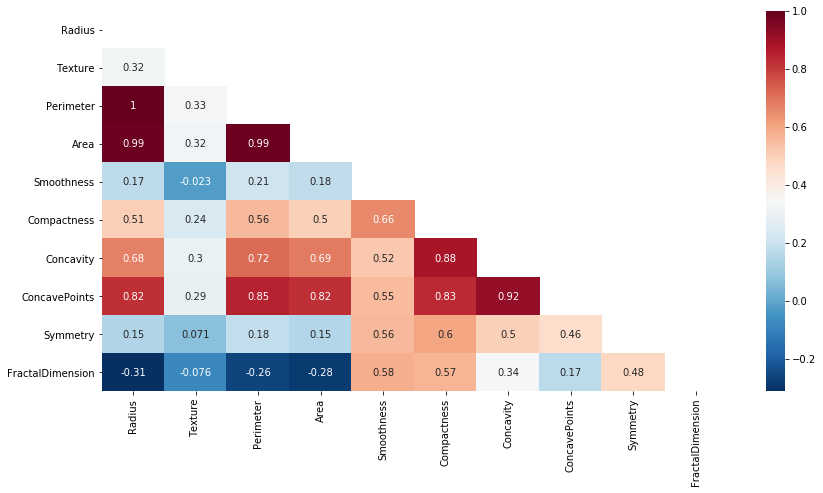

In [4]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(BCancer.corr())
sns.heatmap(BCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Smoothness [Posición 6]

4) Compactness [Posición 7]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

#### **3) Definición de variables predictoras y variable clase**


In [5]:
BCancer = BCancer.replace({'M': 'Malignant', 'B': 'Benign'})
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [6]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
Benign       357
Malignant    212
dtype: int64


In [7]:
#Variables predictoras
X = np.array(BCancer[['Texture', 
                      'Area', 
                      'Smoothness', 
                      'Compactness', 
                      'Symmetry', 
                      'FractalDimension']])
pd.DataFrame(X)

#X = np.array(BCancer[['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness',	'Concavity', 'ConcavePoints', 'Symmetry',	'FractalDimension']])
#pd.DataFrame(X)

,0,1,2,3,4,5
0,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,29.33,1265.0,0.11780,0.27700,0.2397,0.07016


In [8]:
#Variable clase
Y = np.array(BCancer[['Diagnosis']])
pd.DataFrame(Y)

,0
0,Malignant
1,Malignant
2,Malignant
3,Malignant
4,Malignant
...,...
564,Malignant
565,Malignant
566,Malignant
567,Malignant


#### **4) División de datos y aplicación del algoritmo**

Árbol de decisión (Clasificación)



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [10]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [11]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,17.53,310.8,0.10070,0.07326,0.1890,0.06331
1,21.98,359.9,0.08801,0.05743,0.2016,0.05977
2,14.86,800.0,0.09495,0.08501,0.1735,0.05875
3,17.84,451.1,0.10450,0.07057,0.1900,0.06635
4,22.44,466.5,0.08192,0.05200,0.1544,0.05976
...,...,...,...,...,...,...
450,19.98,1102.0,0.08923,0.05884,0.1550,0.04996
451,24.04,475.9,0.11860,0.23960,0.2030,0.08243
452,18.32,278.6,0.10090,0.05956,0.1506,0.06959
453,18.22,288.1,0.06950,0.02344,0.1653,0.06447


In [12]:
pd.DataFrame(Y_train)

,0
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign
...,...
450,Malignant
451,Malignant
452,Benign
453,Benign


In [13]:
#Se entrena el modelo a partir de los datos de entrada
#ClasificacionAD = DecisionTreeClassifier(random_state=0, min_samples_leaf=2)
#ClasificacionAD.fit(X_train, Y_train)

ClasificacionAD = DecisionTreeClassifier(max_depth=6, min_samples_split=4, min_samples_leaf=2)
ClasificacionAD.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Se generan las clasificaciones

In [14]:
#Se etiquetan las clasificaciones
Y_Clasificacion = ClasificacionAD.predict(X_validation)
pd.DataFrame(Y_Clasificacion)

,0
0,Malignant
1,Benign
2,Benign
3,Benign
4,Benign
...,...
109,Malignant
110,Benign
111,Malignant
112,Malignant


In [15]:
Valores = pd.DataFrame(Y_validation, Y_Clasificacion)
Valores

,0
Malignant,Malignant
Benign,Benign
Benign,Benign
Benign,Benign
Benign,Benign
...,...
Malignant,Malignant
Benign,Benign
Malignant,Malignant
Malignant,Malignant


In [16]:
#Se calcula la exactitud promedio de la validación
ClasificacionAD.score(X_validation, Y_validation)

0.9210526315789473

#### **5) Validación del modelo**


In [17]:
#Matriz de clasificación
Y_Clasificacion = ClasificacionAD.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Y_Clasificacion, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,Benign,Malignant
Real,,
Benign,62,5
Malignant,4,43


In [18]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionAD.criterion)
print('Importancia variables: \n', ClasificacionAD.feature_importances_)
print("Exactitud", ClasificacionAD.score(X_validation, Y_validation))
print(classification_report(Y_validation, Y_Clasificacion))

Criterio: 
 gini
Importancia variables: 
 [0.07517684 0.70696559 0.05162335 0.16381175 0.00242247 0.        ]
Exactitud 0.9210526315789473
              precision    recall  f1-score   support

      Benign       0.94      0.93      0.93        67
   Malignant       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [19]:
Importancia = pd.DataFrame({'Variable': list(BCancer[['Texture', 'Area', 'Smoothness', 
                                                     'Compactness', 'Symmetry', 'FractalDimension']]),
                            'Importancia': ClasificacionAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,Area,0.706966
3,Compactness,0.163812
0,Texture,0.075177
2,Smoothness,0.051623
4,Symmetry,0.002422
5,FractalDimension,0.000000


#### **6) Eficiencia y conformación del modelo de clasificación**

* En la matriz de confusión se utilizó 114 instancias de prueba, clasificándose de manera errónea 8 casos. Esto hace que el modelo tenga un 92.98% de exactitud y un 94% de precisión para los casos Benignos y 91% para los casos malignos.

* Por otro lado, el error promedio es de 7.02%.

In [20]:
#!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

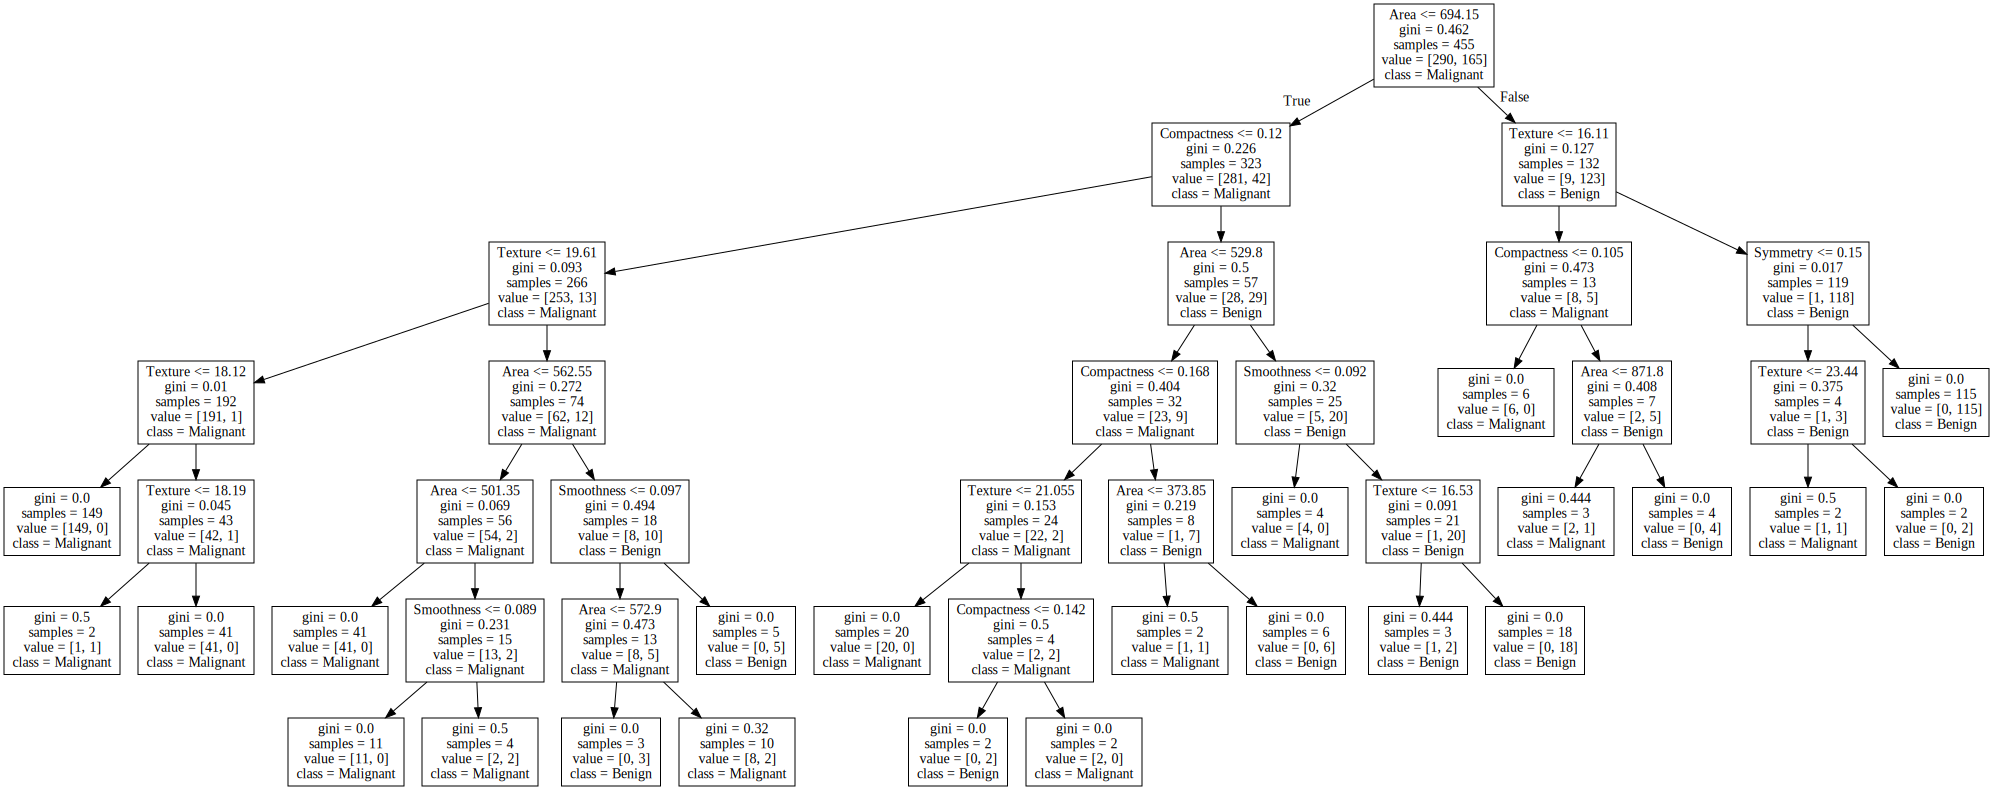

In [21]:
# Se crea un objeto para visualizar el árbol
Elementos = export_graphviz(ClasificacionAD, 
                            feature_names = ['Texture', 'Area', 'Smoothness', 
                                             'Compactness', 'Symmetry', 'FractalDimension'],
                            class_names = Y_Clasificacion)  
Arbol = graphviz.Source(Elementos)
Arbol

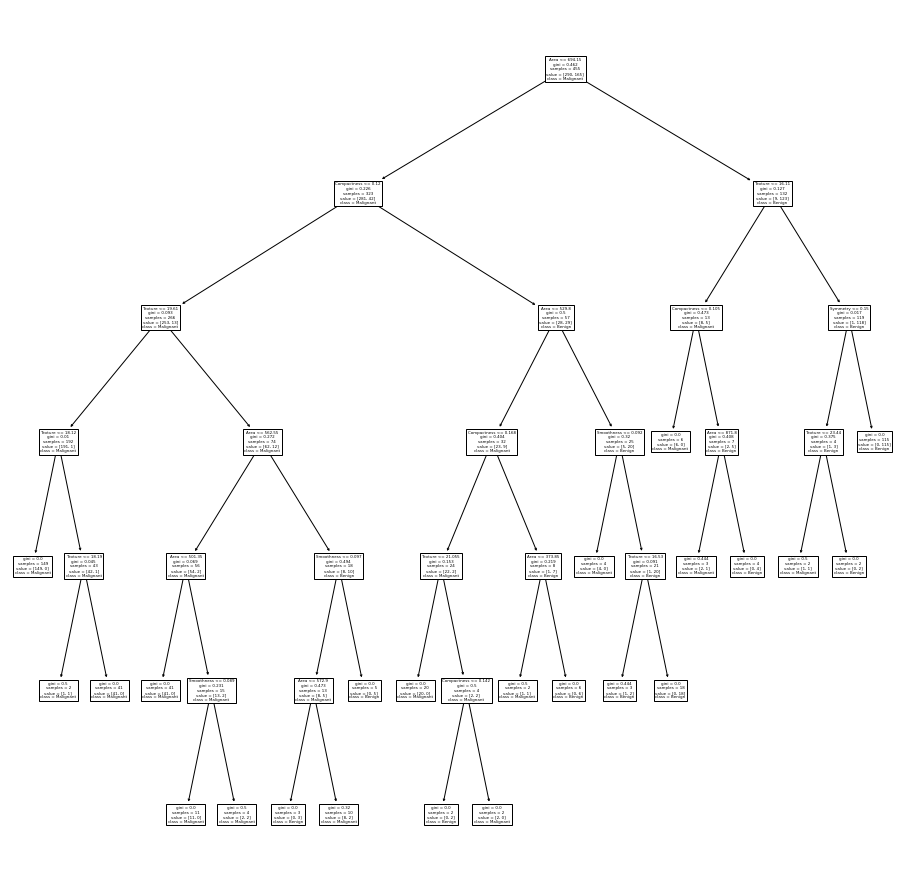

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(ClasificacionAD, 
          feature_names = ['Texture', 'Area', 'Smoothness', 
                           'Compactness', 'Symmetry', 'FractalDimension'],
          class_names = Y_Clasificacion)
plt.show()

In [23]:
from sklearn.tree import export_text
Reporte = export_text(ClasificacionAD, 
                      feature_names = ['Texture', 'Area', 'Smoothness', 
                                       'Compactness', 'Symmetry', 'FractalDimension'])
print(Reporte)

|--- Area <= 694.15
|   |--- Compactness <= 0.12
|   |   |--- Texture <= 19.61
|   |   |   |--- Texture <= 18.12
|   |   |   |   |--- class: Benign
|   |   |   |--- Texture >  18.12
|   |   |   |   |--- Texture <= 18.19
|   |   |   |   |   |--- class: Benign
|   |   |   |   |--- Texture >  18.19
|   |   |   |   |   |--- class: Benign
|   |   |--- Texture >  19.61
|   |   |   |--- Area <= 562.55
|   |   |   |   |--- Area <= 501.35
|   |   |   |   |   |--- class: Benign
|   |   |   |   |--- Area >  501.35
|   |   |   |   |   |--- Smoothness <= 0.09
|   |   |   |   |   |   |--- class: Benign
|   |   |   |   |   |--- Smoothness >  0.09
|   |   |   |   |   |   |--- class: Benign
|   |   |   |--- Area >  562.55
|   |   |   |   |--- Smoothness <= 0.10
|   |   |   |   |   |--- Area <= 572.90
|   |   |   |   |   |   |--- class: Malignant
|   |   |   |   |   |--- Area >  572.90
|   |   |   |   |   |   |--- class: Benign
|   |   |   |   |--- Smoothness >  0.10
|   |   |   |   |   |--- class: Mali

#### **7) Nuevas clasificaciones**

In [24]:
#Paciente P-842302 (1) -Tumor Maligno-
PacienteID1 = pd.DataFrame({'Texture': [10.38], 
                            'Area': [1001.0], 
                            'Smoothness': [0.11840], 
                            'Compactness': [0.27760], 
                            'Symmetry': [0.2419], 
                            'FractalDimension': [0.07871]})
ClasificacionAD.predict(PacienteID1)

array(['Malignant'], dtype=object)

In [25]:
#Paciente P-92751 (569) -Tumor Benigno-
PacienteID2 = pd.DataFrame({'Texture': [24.54], 
                            'Area': [181.0], 
                            'Smoothness': [0.05263], 
                            'Compactness': [0.04362], 
                            'Symmetry': [0.1587], 
                            'FractalDimension': [0.05884]})
ClasificacionAD.predict(PacienteID2)

array(['Benign'], dtype=object)